
# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px"> EDA on Data Science Job Salaries </div>


![image](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fyt3.googleusercontent.com%2Fytc%2FAGIKgqNZdVun8xUvSBVyDLWTqqQNpUNlYsFeXoOe1LQSMw%3Ds900-c-k-c0x00ffffff-no-rj&f=1&nofb=1&ipt=bc22537af8aa6fe4d950fda0c963c8755c0bab2822bd9b2b645cdb2496ec70d7&ipo=images9)

<h3 style="text-align: left;background-color: #128EB3; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset</h3>

<h4>Data Science Job Salaries Dataset contains 11 columns, each are:</h4>


* <b>  work_year </b>: The year the salary was paid.
* <b>  job_title</b>: The role worked in during the year.
* <b>  job_category</b>: The type of employment for the role
* <b>  salary_currency</b>: The currency of the salary paid as an ISO 4217 currency code.
* <b>  salary</b>: The total gross salary amount paid.
* <b>  salaryinusd</b>: The salary in USD 
* <b>  employee_residence</b>: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* <b>  experience_level</b>: The experience level in the job during the year
* <b>  employment_type</b>: The type of employment for the role
* <b>  work_setting</b>: The overall amount of work done in-person
* <b>  company_location</b>: The country of the employer's main office or contracting branch
* <b>  company_size</b>: The median number of people that worked for the company during the year

<h3 style="text-align: left; background-color: #128EB3; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook Objectives</h3>

<h4>Goal of the notebook is to:</h4> 

1. Explore <b>every feature</b> in the dataset; <br>

2. <b>Work Year Analysis</b>(with <b>Salary, Work_Setting</b>);<br>

3. <b>Experience Level Analysis</b> (with <b>job_category, Top 3 Job Title, Company Size</b>);

4. <b>Company Location Analysis</b> (with <b>Experience Level</b>)

5. <b>Salary Analysis</b> (with <b> Work Year, Experience Level, Company Size, Job Title, Remote Ratio</b>)


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #128EB3; font-family:Times New Roman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents</b></h3>
    
   * [1. Import Necessary Libraries](#1)
   * [2. Univariate Analysis](#2)
    - [2.1. Categorical Columns](#2.1)
        - [2.1.1. Experience Level](#2.1.1)
        - [2.1.2. Job Titles](#2.1.2)
        - [2.1.3. Employment Type](#2.1.3)
        - [2.1.4. Employee Residence & Company Location](#2.1.4)
        - [2.1.5. Company Size](#2.1.5)
     -  [2.2. Numeric Columns](#2.2)
        - [2.2.1. Work Year](#2.2.1)
        - [2.2.2. Salary in USD](#2.2.2)
        - [2.2.3. Work_Setting Ratio](#2.2.3)
   * [3. Work Year Analysis🗓](#3)
       - [3.1. Work_Setting by Work Year](#3.1)  
   * [4. Experience Level Analysis](#4)
        - [4.1. Employment Type by Experience Level](#4.1)  
        - [4.2. Top 3 Job Title by Experience Level](#4.2) 
        - [4.3. Company Size by Experience Level](#4.3) 
   * [5. Company Location Analysis](#5)
       - [5.1. Experience Level](#5.1)
   * [6. Salary Analysis](#6)
       - [6.1. Salary by work year](#6.1)
       - [6.2. Salary by Experience Level](#6.2)
       - [6.3. Salary by Company Size](#6.3)
       - [6.4. 20 Highest salaries by job title](#6.4)
       - [6.5. Average Salary by Company Location](#6.5)


<a id="1"></a>
# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>

<h4> First, import necessary libraries below: </h4>

#install 
!pip install country_converter

In [1]:
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
df = pd.read_csv('C:\\Users\\Atsuy\\oeson-project\\Project2\\Project 2 data.csv')


In [2]:
print(df.shape)
df.tail(3)

(9355, 12)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


<b>Finally, we got <mark>12 columns</mark> with 9355 rows:</b><br><br>
<b>3 numeric columns</b>: (1)<u>work_year</u>, (2)<u>salary_in_usd</u>, (3)<u>salary</u><br><br>
<b>9 categorical columns</b>: (1)<u>experience_level</u>, (2)<u>employment_type</u>, (3)<u>job_title</u>, (4)<u>employee_residense</u>, (5)<u>company_location</u>, (6)<u>company_size</u>(7)<u>job_category</u>(8)<u>salary_currency</u>(9)<u>work_setting</u>

Text(0.5, 1.0, 'Distribution of Missing Values')

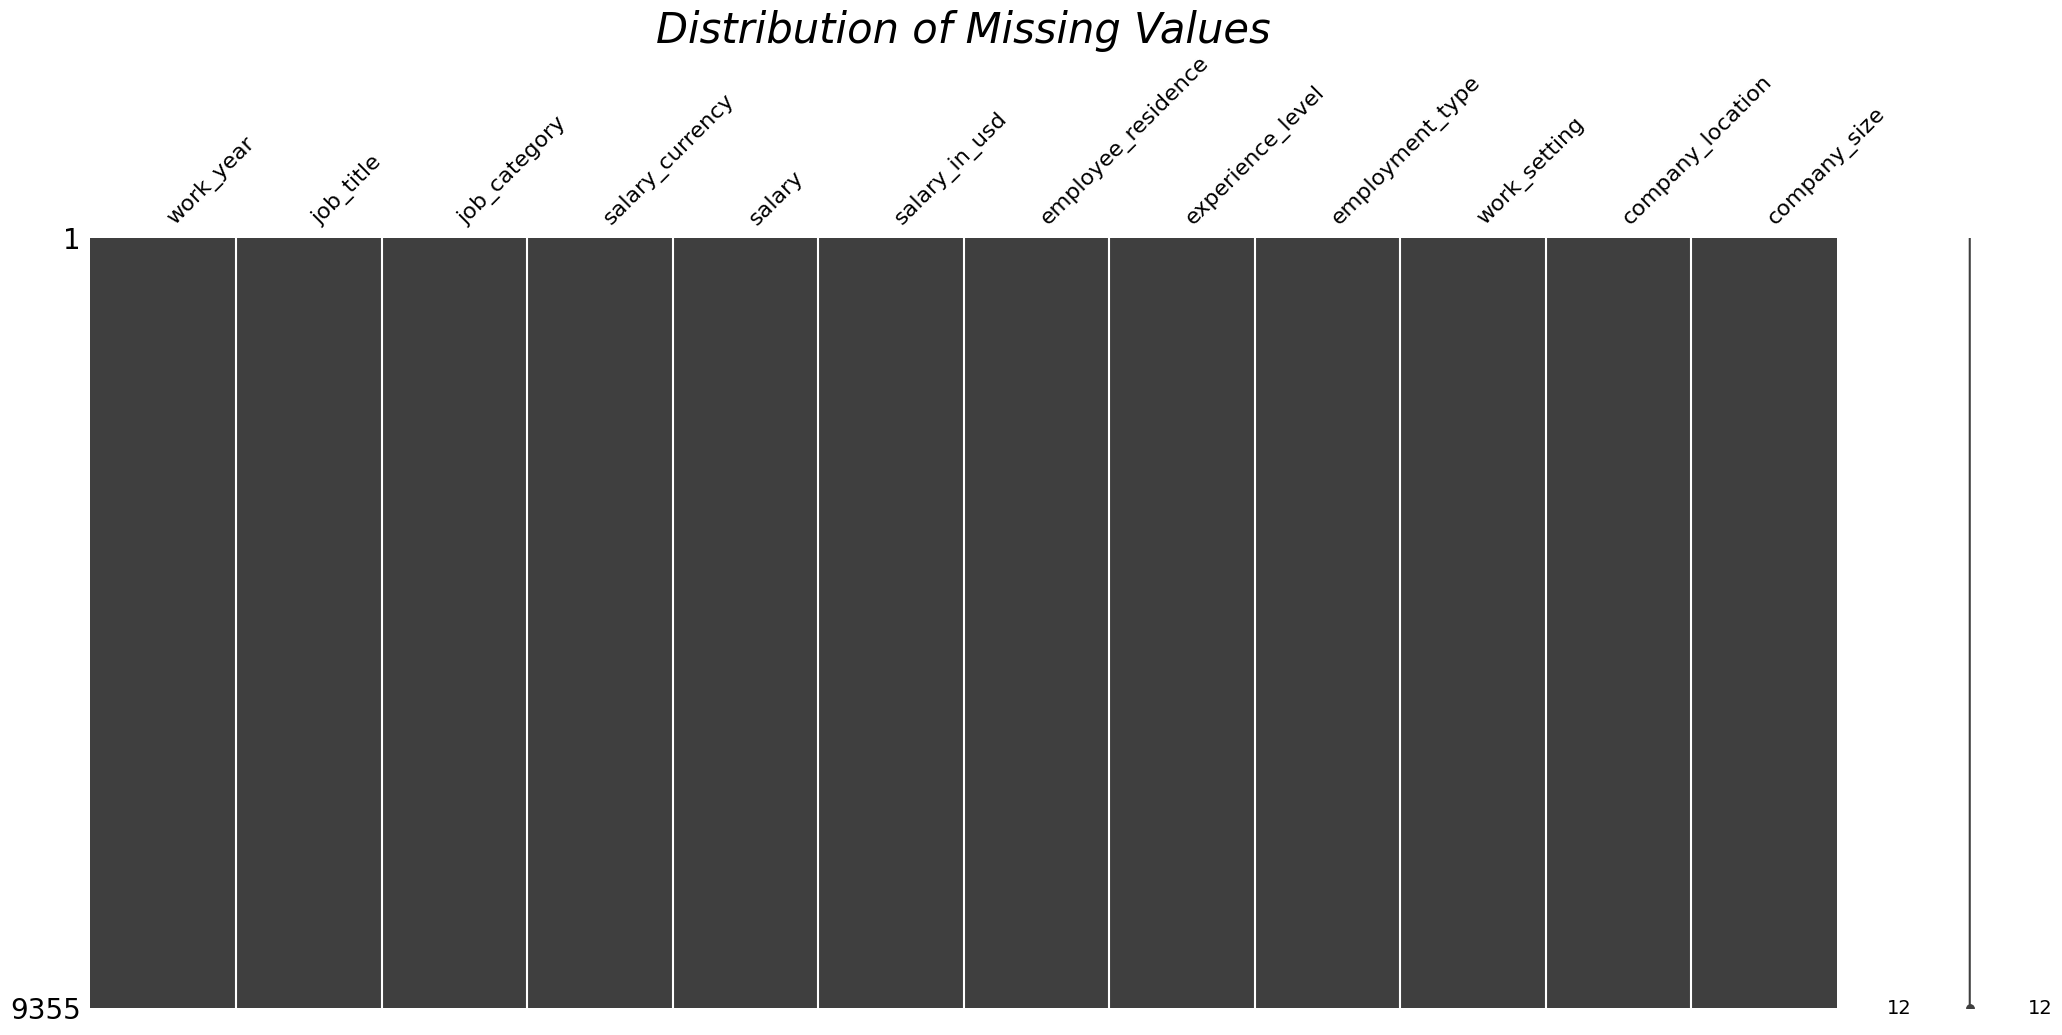

In [3]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

And it is  clear that there's <b>no missing value</b> on the dataset.

<a id="2"></a>
# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2. Univariate Analysis📊 (explore each columns)</div>

<h4>In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.</h4>
<h4> Mainly two parts in the section: Analysis on categorical columns; Analysis on numeric columns.<h4>

<a id="2.1"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">2.1. Categorical Columns</div>

<h4>6 categorical columns in the dataset:</h4><br>

* Experiece Level
* Job Titles
* Employment Type
* Employee Resdience
* Company Location
* Company Size.

<a id="2.1.1"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.1. Experience Level</div>

<h4>There's 4 categorical values  in column 'Experience Level', each are: </h4><br>
EN, which refers to <b>Entry-level</b> <br>
MI, which refers to <b>Mid-level</b> <br>
SE, which refers to <b>Senior</b> <br>
EX, which refers to <b>Executive</b> <br>

In [4]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior')
df['experience_level'] = df['experience_level'].replace('EX','Executive')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = '2.1.1. Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

<b>From treemap above, we can notice that <mark>Senior</mark> accounts for <u>46%</u>, and <mark>Mid-level</mark> ranked the next. </b> <br>
<b>There's only 4.28% of Executive</b>.

<a id="2.1.2"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.2. Job Titles</div>

<h4> In this section, We'll answer two questions below:</h4>

1. <b>How many</b> job titles in the dataset? <br>
    
2. Which are <b>top 10 frequent</b> job titles?<br>

In [5]:
print('how many job titles in the dataset: ',df['job_title'].value_counts().size)

how many job titles in the dataset:  125


<b> Shown as above, there are 125 job titles in the dataset. </b>

plot a bar chart to see top 10 job titles below:

In [6]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= '2.1.2. Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<b><u><mark>Data scientist</mark></u>, <u><mark>data engineer</mark></u> and <u><mark>data analyst</mark></u> ranked top 3 frequent job titles, but it can be easily seen that others are also related to <u>those top 3 job titles</u>.</b>

<b> and <mark>WordCloud of job title</mark> shown as below</b>:

In [7]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

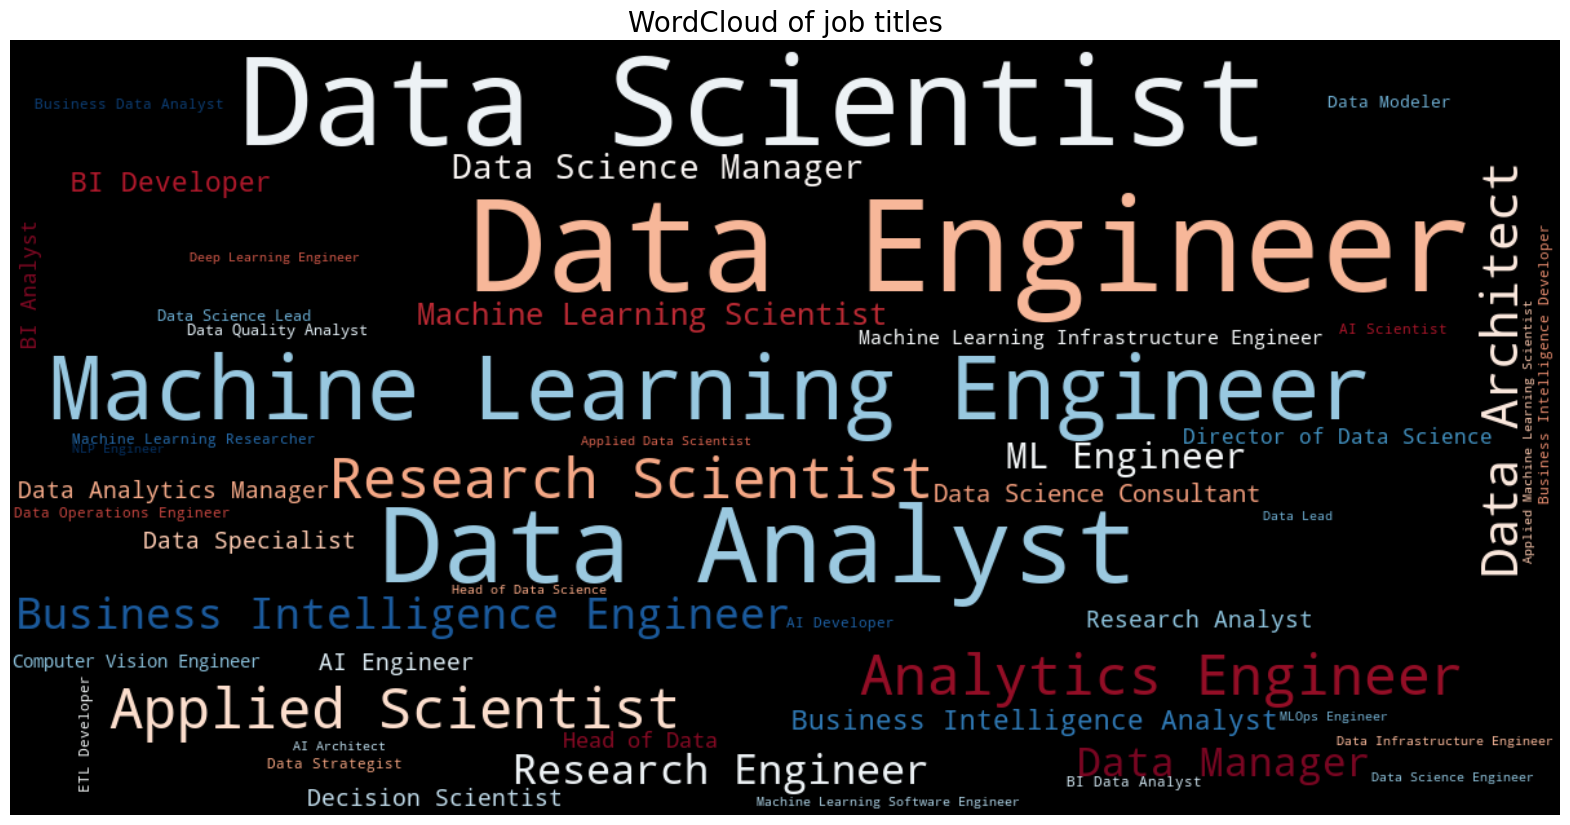

In [8]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

<a id="2.1.3"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.3. Employment Type</div>

<h4>4 employment type here, each are:</h4><br>

<b>PT</b>: Part-time<br>
<b>FT</b>: Full-time<br>
<b>CT</b>: Contract<br>
<b>FL</b>: Freelance<br>

In [9]:
type_grouped = df['employment_type'].value_counts()
e_type = ['Full-Time','Part-Time','Contract','Freelance']
fig = px.bar(x = e_type, y = type_grouped.values, 
       color = type_grouped.index, 
       color_discrete_sequence=px.colors.sequential.PuBuGn,
       template = 'plotly_dark',
       text = type_grouped.values, title = '2.1.3. Employment Type Distribution')
fig.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.update_traces(width=0.5)
fig.show()

<b>Most of employee types are <mark>full-time</mark>.</b>

<a id="2.1.4"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.4. Employee Residence & Company Location </div>

<h4>We'll explore <mark>employee's residence</mark> and <mark>company location</mark> by plotting map & bar charts in this section.</h4>

convert country into choropleth readable type:

In [10]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [11]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title = '2.1.4.(1) Employee Loaction Distribution Map')

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()

<b>Most of the employees are from <mark>USA</mark>, and bar plot below:</b>

In [12]:
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= '2.1.4.(2) Top 10 Location of Employee',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<b>Now we found that the USA contains about 332 accounts, and <mark>GBR</mark>, <mark>IND</mark> ranked the next. </b>

<b>Let's compare employee residence and company location below:</b>

In [13]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country
c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Loaction', 
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values,marker_color='crimson'),
    go.Bar(name='Company Location', x=top_10_company_location.index, 
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='white')
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='2.1.4.(3) Comparison of Employee Location and Company Location',template='plotly_dark',
                  font = dict(size=17,family="Franklin Gothic"))

fig.show()

<b><mark>USA, GBR, CAN and DEU</mark> have higher count of company location then employee location as shown above</b>.<br>

<a id="2.1.5"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.5. Company Size</div>

In [14]:
grouped_size = df['company_size'].value_counts()

fig = px.bar(y=grouped_size.values, 
             x=grouped_size.index, 
             color = grouped_size.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=grouped_size.values,
             title= '2.1.5. Distribution of Company Size',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<b><mark>Company size</mark> mostly consists of <mark>medium size</mark>, and the <mark>large size</mark> ranked the next</b>.

<a id="2.2"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">2.2. Explore Numeric Columns</div>

<h4>We'll explore 3 numeric columns in this section, each are:</h4>

* <b>work_year</b>: The year the salary was paid
* <b>salary_in_usd</b>: The salary in USD
* <b>remote_ratio</b>: The overall amount of work done remotely,

<a id="2.2.1"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.2.1. Work Year</div>

In [15]:
wkyear = df['work_year'].value_counts()
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= '2.2.1. work year distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

<b>2022 year data accounts for <mark>52.4%</mark> in the dataset, the next is 2021, which accounts for <mark>35.7%</mark>.</b>

<a id="2.2.2"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.2.2. Salary in USD</div>

<b>Used box plot & distplot to see the distribution of Salary in USD</b>

In [16]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']
fig1 = px.box(y=df['salary_in_usd'],template= 'plotly_dark', title = '2.2.2.(1) Salary in USD (BoxPlot)')
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig2.update_layout(title='2.2.2.(2) Salary in USD(DistPlot)', font = dict(size=17, family="Franklin Gothic")) 
fig1.show()
fig2.show()

<b>Salary in USD is shown as above, we can see that salary mostly distributed between <mark>100k and 150k</mark>.</b>

<a id="2.2.3"></a>
### <div style="text-align: left; background-color:#13A9D5; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.2.3. work_setting_ration</div>

In [17]:
work_ratio = ['In-person','Hybrid','Remote']

plt.figure(figsize=(20,5))
fig = px.bar(x = ['In-person','Hybrid','Remote'], 
       y = df['work_setting'].value_counts().values,
       color = work_ratio,
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['work_setting'].value_counts().values,
       title = '2.2.3. work_setting_ratio Distribution',
       template='plotly_dark')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2



fig.update_layout(
    xaxis_title="work_setting_ration",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<Figure size 2000x500 with 0 Axes>

<b>5730 of works are working<mark>In-person</mark>, and <mark>Hybrid</mark> ranked the next, with count of 3434.</b>

<a id="3"></a>
#  <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Work Year Analysis</div>

<h4>We'll do analysis on work_setting_ration by Work Year in this section to explore whether remote ratio affected by work year.</h4>

<a id="3.1"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">3.1. Remote Ratio by Work Year</div>

<b>Plot Rader plot to observe relations between Remoto Ratio and Work Year below:</b>

In [18]:
remote_year = df.groupby(['work_year','work_setting']).size()
ratio_2021 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2022 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2023 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
fig = go.Figure()
categories = ['In-person','Hybrid','Remote']
fig.add_trace(go.Scatterpolar(
             r = ratio_2021, 
             theta = categories,
             fill = 'toself',
             name = '2021 work_setting_ration'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2022, 
             theta = categories,
             fill = 'toself',
             name = '2021 work_setting_ration'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2023, 
             theta = categories,
             fill = 'toself',
             name = '2022 work_setting_ration'
#              fillcolor = 'lightblue'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
#       visible=True,
      range=[0, 0.75]
    )),
  font = dict(family="Franklin Gothic", size=17),
  showlegend=True,
  title = '3.1. Work Setting Ratio by Work Year'
)
fig.layout.template = 'plotly_dark'
fig.show()

<mark>72%</mark> of companies adopt <b>fully remote work</b> in <b>2022 year</b>, which is the largest ratio among 2021 year & 2020 year. <br>

We can guess that it is due to <b><mark>pandemic.</mark></b>

<a id="4"></a>
# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">4. Experience Level Analysis</div>

<h4>3 main parts in section 4, each are:</h4>

* 1. <b>Employment Type</b> by Experience Level
* 2. <b>Top 3 Job Title</b> by Experience Level
* 3. <b>Company Size</b> by Experience Level

<a id="4.1"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px"> 4.1. Employment Type by Experience Level</div>

In [19]:
exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level', x=exlevel_type['Entry-level'].index, y=exlevel_type['Entry-level'].values,
           text=exlevel_type['Entry-level'].values, marker_color='white'),
    go.Bar(name='Executive', x=exlevel_type['Executive'].index, y=exlevel_type['Executive'].values,
           text=exlevel_type['Executive'].values, marker_color='red'),
    go.Bar(name='Mid-level', x=exlevel_type['Mid-level'].index, y=exlevel_type['Mid-level'].values,
           text=exlevel_type['Mid-level'].values, marker_color='yellow'),
    go.Bar(name='Senior', x=exlevel_type['Senior'].index, y=exlevel_type['Senior'].values,
           text=exlevel_type['Senior'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='4.1. Experiece Level with Employment Type', font = dict(family="Franklin Gothic", size=17), template='plotly_dark')

fig.show()

<b>Type of <u>Part-Time</u> consists of <mark>Entry-level</mark> and <mark>Mid-level</mark>.<br> 


<a id="4.2"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px"> 4.2. Top 3 Job Title by Experience Level</div>

In [20]:
exlevel_job = df.groupby(['experience_level','job_title']).size()

entry_top3 = exlevel_job['Entry-level'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior'].sort_values(ascending=False)[:3]

exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level', x=entry_top3.index, y=entry_top3.values,
           text=entry_top3.values, marker_color='white'),
    go.Bar(name='Executive', x=executive_top3.index, y=executive_top3.values,
           text=executive_top3.values, marker_color='red'),
    go.Bar(name='Mid-level', x=mid_top3.index, y=mid_top3.values,
           text=mid_top3.values, marker_color='yellow'),
    go.Bar(name='Senior', x=senior_top3.index, y=senior_top3.values,
           text=senior_top3.values, marker_color='blue'),
])
fig.update_layout(barmode = 'stack', xaxis_tickangle=-45, title='4.2. Experiece Level with top 3 job title', font = dict(family="Franklin Gothic", size=15), template='plotly_dark')

fig.show()

* 1. <b>Entry-level</b> tends to have <mark><b>data analyst position</b></mark> rather than data scientist and data engineer;
* 2. <b>Mid-level</b> tends to have <mark><b>data analyst</b> and <b>data engineer position</b></mark> rather then scientist;
* 3. Obviously, there's almost no analyst job with <b>Executive</b>, but tends to have <mark><b>data engineer</b> and <b>head position</b></mark>.

<a id="4.3"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px"> 4.3. Company Size by Experience Level</div>

In [21]:
exlevel_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level', x=exlevel_size['Entry-level'].index, y=exlevel_size['Entry-level'].values,
           text=exlevel_size['Entry-level'].values, marker_color='white'),
    go.Bar(name='Executive', x=exlevel_size['Executive'].index, y=exlevel_size['Executive'].values,
           text=exlevel_size['Executive'].values, marker_color='red'),
    go.Bar(name='Mid-level', x=exlevel_size['Mid-level'].index, y=exlevel_size['Mid-level'].values,
           text=exlevel_size['Mid-level'].values, marker_color='yellow'),
    go.Bar(name='Senior', x=exlevel_size['Senior'].index, y=exlevel_size['Senior'].values,
           text=exlevel_size['Senior'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='4.3. Experience Level with Company Size', font=dict(family="Franklin Gothic", size=17), template='plotly_dark')

fig.show()

We can notice that most of <b>Senior</b> works in <mark>medium size</mark> of company.

<a id="5"></a>
# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">5. Company Location Analysis🗺️</div>

<h4>Here, we'll explore <mark>company location</mark> by <mark>experience level</mark> using map plot</h4>

<a id="5.1"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">5.1. Experience Level</div>

<b>plot choropleth for each experience levels: </b>

In [22]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country

exlevel_location = df.groupby(['experience_level','company_location']).size()

entry_location = exlevel_location['Entry-level']
executive_location = exlevel_location['Executive']
mid_location = exlevel_location['Mid-level']
senior_location = exlevel_location['Senior']

fig1 = px.choropleth(locations=entry_location.index,
                    color=entry_location.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template='plotly_dark',
                    title = '5.1.(1) Entry-level Company Location')

fig2 = px.choropleth(locations=mid_location.index,
                    color=mid_location.values,
                    color_continuous_scale=px.colors.sequential.Viridis,
                    template='plotly_dark',
                    title = '5.1.(2) Mid-level Company Location')

fig3 = px.choropleth(locations=senior_location.index,
                    color=senior_location.values,
                    color_continuous_scale=px.colors.sequential.Inferno,
                    template='plotly_dark',
                    title = '5.1.(3) Senior Company Location')

fig4 = px.choropleth(locations=executive_location.index,
                    color=executive_location.values,
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    template='plotly_dark',
                    title = '5.1.(4) Executive Company Location')

fig1.add_scattergeo(
    locations=entry_location.index,
    text= entry_location.values, 
    mode='text')

fig2.add_scattergeo(
    locations=mid_location.index,
    text= mid_location.values, 
    mode='text')

fig3.add_scattergeo(
    locations=senior_location.index,
    text= senior_location.values, 
    mode='text')


fig4.add_scattergeo(
    locations=executive_location.index,
    text= executive_location.values, 
    mode='text')

fig1.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig2.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig3.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig4.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig1.show()
fig2.show()
fig3.show()
fig4.show()

<b>A higher level means tends to go to the United States,<br>
while lower levels often mean staying in one's own country.</b>

<a id="6"></a>
# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">6. Salary Analysis💰💵</div>

<b>The part 'Salary Analysis' consists of <mark>5 parts</mark>, each are</b>:
<br>1. <b>Salary</b> by  <mark>Work Year</mark>
<br>2. <b>Salary</b> by  <mark>Experience Level</mark>
<br>3. <b>Salary</b> by  <mark>Company Size</mark>
<br>4. <b>Higest salaries</b> by  <mark>Job Titles</mark>
<br>5. <b>Average Salary</b> by  <mark>Company Location</mark> 

<a id="6.1"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">6.1. Salary by work year</div>

In [23]:
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
w2023 = df.loc[(df['work_year'] == 2023)]
hist_data = [w2021['salary_in_usd'],w2022['salary_in_usd'],w2023['salary_in_usd']]
group_labels = ['2021 salary','2022 salary','2023 salary']
colors = ['white','red','blue']

year_salary = pd.DataFrame(columns=['2021','2022','2023'])
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = w2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig2 = go.Figure(data=px.bar(x= year_salary.columns, 
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title='6.1.(2) Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
#                             width = [year_salary.values.tolist()[0]],
                            template = 'plotly_dark',
                            height=500))
fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='6.1.(1) Salary Distribution by Work Year', font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.3)
fig2.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

<b>There are higher salary amounts in 2022 than the levels in 2021 and 2020.</b><br>
<b>The levels in 2021 and 2020 are about the same.</b>

<a id="6.2"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">6.2. Salary by Experience Level</div>

In [24]:
exlevel_salary = df[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior']

hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]
group_labels = ['Entry-level','Mid-level','Senior','Executive']
colors = ['white','yellow','blue','red']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='6.2.(2) Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='6.2.(1) Salary Distribution by Experience Level',font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

<b>One can see that <mark>entry-level</mark> is distributed along with lower salaries,</b><br>
<b>while the <mark>executive-level</mark> is plotted along higher salaries</b>.

<a id="6.3"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">6.3. Salary by Company Size</div>

In [25]:
c_size = df[['company_size','salary_in_usd']]
small = exlevel_salary.loc[c_size['company_size']=='S']
mid = exlevel_salary.loc[c_size['company_size']=='M']
large = exlevel_salary.loc[c_size['company_size']=='L']
hist_data = [small['salary_in_usd'],mid['salary_in_usd'],large['salary_in_usd']]
group_labels = ['Company Size: Small','Company Size: Mid','Company Size: Large']
colors = ['white','red','blue']

lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize=(20,5))
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='6.3.(2) Mean Salary by Company Size',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='6.3.(1) Salary Distribution by Company Size',font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.3)
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

<Figure size 2000x500 with 0 Axes>

<b>White</b>, <mark>yellow</mark> and <b style='color:blue'>blue</b> lines each stand for <b>Small</b>, <mark>Mid</mark>, <b style='color:blue'>Large size</b> of company. <br>
It is obvious that <b>Mid size of company</b> distributed along with <b>higher salaries</b>, and <b>Large size company</b> has <b>higher salaries</b> than <b>Small size company</b>. <br>
Thus, we can get a conclusion as <b>large size company</b> not necessarily has <b>higher salaries</b> than <b>mid size company</b>.

<a id="6.4"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">6.4. Highest salaries by job title</div>

In [26]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='6.4. Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))

<b>Collected here are the <mark>20 highest salaries</mark> listed through job title.</b>

<a id="6.5"></a>
## <div style="text-align: left; background-color:#0A93BB; font-family:Times New Roman;color: white; padding: 14px; line-height: 1;border-radius:10px">6.5. Average Salary by Company Location</div>

In [27]:
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = '6.5. Average Salary by Company Location')
fig.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig.show()

<b>Higher average salaries have <mark>brighter colours</mark>, while lower average salaries have darker colours. <br>
    Here, we can see that <mark>USA</mark> have higher average salaries and brighter colours.</b>

In [28]:
fig=px.treemap(df,path=[px.Constant('Job Roles'),'job_title','company_location','experience_level'],template='ggplot2',hover_name='job_title',title='<b>TreeMap of Different Roles in Data Science with Experience Level')
fig.update_traces(root_color='lightgrey')

lastely, we have this interactive treemap.

<h1 style= 'text-align: center; color: blue; font-family:Times New Roman'> 🙇Thanks For Watching ! Harry/Atsuya </h1>
